# Pandas - Python Data Analysis

## Upgrade PIP

Windows

    python -m pip install -U pip

Linux
   
    pip install -U pip

### Install Packages if required

In [67]:
!pip install wheel

## Importing required libraries

In [221]:
%matplotlib inline
from pandas import *
from pylab import *
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from __future__ import division

def side_by_side(*objs, **kwds):
    from pandas.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)
    
def htmldisp(x):
    try:
        return HTML(pd.DataFrame(x).to_html())
    except:
        print ("Alert!! \nInput should be a Pandas obj.")

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

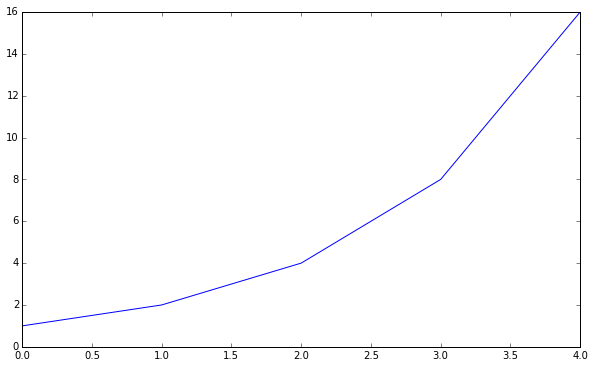

In [69]:
plt.plot([1,2,4,8,16])

Series
======

In [70]:
np.random.randn(5)

array([-0.66537514, -0.5677748 , -0.53418025,  0.51045839,  0.11856411])

In [71]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(np.random.randn(5), index=labels)

In [72]:
'b' in s

True

In [73]:
s['b']

1.468315359355616

In [74]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [75]:
s

a   -0.502969
b    1.468315
c   -0.586066
d   -0.037522
e    0.229438
dtype: float64

In [76]:
mapping = s.to_dict()
mapping

{'a': -0.50296937834505506,
 'b': 1.468315359355616,
 'c': -0.58606560139888719,
 'd': -0.037522292320861968,
 'e': 0.229438447928906}

In [77]:
s = pd.Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b    1.468315
e    0.229438
a   -0.502969
d   -0.037522
f         NaN
dtype: float64

In [78]:
notnull(s)

b     True
e     True
a     True
d     True
f    False
dtype: bool

In [79]:
s[notnull(s)]

b    1.468315
e    0.229438
a   -0.502969
d   -0.037522
dtype: float64

In [80]:
s.dropna()

b    1.468315
e    0.229438
a   -0.502969
d   -0.037522
dtype: float64

In [81]:
s * 2

b    2.936631
e    0.458877
a   -1.005939
d   -0.075045
f         NaN
dtype: float64

In [82]:
s[3:]

d   -0.037522
f         NaN
dtype: float64

In [83]:
s[:3]

b    1.468315
e    0.229438
a   -0.502969
dtype: float64

In [84]:
s.index

Index([u'b', u'e', u'a', u'd', u'f'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [85]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

,a,b,c,d
0,-0.704317,foo,-1.782846,0
1,-0.768235,bar,-0.916710,1
2,0.335652,foo,0.732409,2
3,-1.040598,bar,-0.042354,3
4,0.021351,foo,-0.096634,4
5,-0.873731,bar,1.802349,5


In [86]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [87]:
df[:3]

,a,b,c,d
0,-0.704317,foo,-1.782846,0
1,-0.768235,bar,-0.916710,1
2,0.335652,foo,0.732409,2


In [88]:
df[:-2]

,a,b,c,d
0,-0.704317,foo,-1.782846,0
1,-0.768235,bar,-0.916710,1
2,0.335652,foo,0.732409,2
3,-1.040598,bar,-0.042354,3


In [89]:
df[-2:]   # the last 2 rows

,a,b,c,d
4,0.021351,foo,-0.096634,4
5,-0.873731,bar,1.802349,5


In [90]:
df[['a','b']]

,a,b
0,-0.704317,foo
1,-0.768235,bar
2,0.335652,foo
3,-1.040598,bar
4,0.021351,foo
5,-0.873731,bar


In [91]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='|S3')

In [92]:
df.xs(0)   # returning the first row

a   -0.704317
b         foo
c    -1.78285
d           0
Name: 0, dtype: object

In [93]:
df.ix[2]    # does equal thing as above. In this case, 3rd row. 

a    0.335652
b         foo
c    0.732409
d           2
Name: 2, dtype: object

In [94]:
df.ix[2, 'b']

'foo'

In [95]:
timeit df.ix[1]

10000 loops, best of 3: 112 µs per loop


In [96]:
df.get_value(2, 'b')

'foo'

In [97]:
timeit df.ix[2, 'b']

The slowest run took 8.82 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.97 µs per loop


In [98]:
timeit df.get_value(2, 'b')

The slowest run took 11.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.41 µs per loop


In [99]:
df.ix[2:4, 'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [100]:
df.ix[2:4, ['b', 'c']]

,b,c
2,foo,0.732409
3,bar,-0.042354
4,foo,-0.096634


In [101]:
df.ix[2:4, 'b':'c']   # slices by column - essentially the same as above.

,b,c
2,foo,0.732409
3,bar,-0.042354
4,foo,-0.096634


In [102]:
df.ix[2:4, 0:2]

,a,b
2,0.335652,foo
3,-1.040598,bar
4,0.021351,foo


In [103]:
df.ix[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

,b,c,d
0,foo,-1.782846,0
2,foo,0.732409,2
4,foo,-0.096634,4


In [104]:
df['c'] > 0

0    False
1    False
2     True
3    False
4    False
5     True
Name: c, dtype: bool

In [105]:
df.ix[df['c'] > 0]   # boolean arrays

,a,b,c,d
2,0.335652,foo,0.732409,2
5,-0.873731,bar,1.802349,5


In [106]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [107]:
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [108]:
pandas.date_range('1/1/2000',periods=6)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D')

In [109]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=pandas.date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,1.269364,foo,0.825877
2000-01-02,1.037640,bar,-1.477966
2000-01-03,0.621788,foo,-1.342809
2000-01-04,1.180793,bar,-0.799461
2000-01-05,0.824102,foo,-0.887313
2000-01-06,0.047541,bar,1.362241


In [110]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.283341,foo,-0.172198,NaN
1,-1.511962,bar,0.357274,NaN
2,0.327979,foo,0.308704,NaN
3,0.825253,bar,-2.168154,NaN
4,-0.347085,foo,0.032781,NaN
5,-0.051206,bar,1.292636,NaN


In [111]:
isnull(df)

,a,b,c,d
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True


Creation from nested dicts
--------------------------

These arise naturally in Python code

In [112]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()   # sorted cols: bar, baz, foo
data

{'bar': {'a': 0.38112931907002495,
  'b': -0.765909219644571,
  'c': 0.4985234895811544,
  'd': -0.7330625057267428},
 'baz': {'a': 1.7271692781624934,
  'b': 0.7570402996083134,
  'c': 1.2739907718089785,
  'd': -0.20450433532235054},
 'foo': {'a': 0.1980977136126971,
  'b': 1.211788252583382,
  'c': -1.0048549547865768,
  'd': -1.1082866658145967}}

In [113]:
del data ['foo']['c']   # delete an entry by index key (col) and row.

In [114]:
DataFrame(data)   # pass a dict 

,bar,baz,foo
a,0.381129,1.727169,0.198098
b,-0.765909,0.757040,1.211788
c,0.498523,1.273991,NaN
d,-0.733063,-0.204504,-1.108287


Data alignment
==============

In [115]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [172]:
!head -n 10 stock_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [117]:
!head  stock_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [118]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [119]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [120]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [121]:
s1.add(s2, fill_value=0)

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [122]:
(s1 + s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL, dtype: float64

In [123]:
df = close_px.ix[-10:, :3]
df

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50
2011-10-10,10.09,388.81,16.14
2011-10-11,10.30,400.29,16.14
2011-10-12,10.05,402.19,16.40
2011-10-13,10.10,408.43,16.22
2011-10-14,10.26,422.00,16.60


In [124]:
side_by_side(s1.reindex(s2.index), s2)   # align indexes of s1 and s2. Print 2 objects alongside each other.

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [125]:
side_by_side(s1.ix[s2.index], s2)   # same as above, supported in newer version of 0.12 ipython.

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [126]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [127]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

b, c  = s1.align(s2, join='right')
side_by_side(b, c)

In [128]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [129]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [130]:
df + df2

,AAPL,IBM,MSFT
2011-10-03,NaN,346.58,49.06
2011-10-04,NaN,NaN,NaN
2011-10-05,NaN,353.70,51.78
2011-10-06,NaN,NaN,NaN
2011-10-07,NaN,364.78,52.50
2011-10-10,NaN,NaN,NaN
2011-10-11,NaN,370.00,54.00
2011-10-12,NaN,NaN,NaN
2011-10-13,NaN,373.64,54.36
2011-10-14,NaN,NaN,NaN


In [131]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


Transposing: no copy if all columns are same type
-------------------------------------------------

In [132]:
df[:5].T

,2011-10-03 00:00:00,2011-10-04 00:00:00,2011-10-05 00:00:00,2011-10-06 00:00:00,2011-10-07 00:00:00
AAPL,374.60,372.50,378.25,377.37,369.80
IBM,173.29,174.74,176.85,181.69,182.39
MSFT,24.53,25.34,25.89,26.34,26.25


Columns can be any type
-----------------------

In [133]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = pandas.date_range('1/1/2000', periods=n)
foo

,floats,ints,strings,bools,objects
0,2.529748,0,foo,True,2000-01-01
1,-0.975089,1,bar,False,2000-01-02
2,-1.093029,2,foo,False,2000-01-03
3,-1.043257,3,bar,False,2000-01-04
4,1.203834,4,foo,True,2000-01-05
5,-0.974700,5,bar,False,2000-01-06
6,0.427725,6,foo,True,2000-01-07
7,0.995705,7,bar,True,2000-01-08
8,-0.550763,8,foo,False,2000-01-09
9,-1.495519,9,bar,False,2000-01-10


In [134]:
foo.dtypes

floats            float64
ints                int32
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [135]:
foo.T.T

,floats,ints,strings,bools,objects
0,2.52975,0,foo,True,2000-01-01 00:00:00
1,-0.975089,1,bar,False,2000-01-02 00:00:00
2,-1.09303,2,foo,False,2000-01-03 00:00:00
3,-1.04326,3,bar,False,2000-01-04 00:00:00
4,1.20383,4,foo,True,2000-01-05 00:00:00
5,-0.9747,5,bar,False,2000-01-06 00:00:00
6,0.427725,6,foo,True,2000-01-07 00:00:00
7,0.995705,7,bar,True,2000-01-08 00:00:00
8,-0.550763,8,foo,False,2000-01-09 00:00:00
9,-1.49552,9,bar,False,2000-01-10 00:00:00


In [136]:
foo.T.T.dtypes

floats     object
ints       object
strings    object
bools      object
objects    object
dtype: object

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [137]:
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [138]:
df.apply(np.mean)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [139]:
df.mean()   # same as above.   df.mean? to look up the function usage.

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [140]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [141]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [142]:
df.apply(np.mean, axis=1)   # same as above.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

You can get as fancy as you want

In [143]:
close_px    # Output: 1000 rows.

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [144]:
close_px.AAPL   # For easier typing, after dot ., use tab to select the name of the stock.

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
2007-11-05    186.18
2007-11-06    191.79
2007-11-07    186.30
2007-11-08    175.47
2007-11-09    165.37
2007-11-12    153.76
2007-11-13    169.96
2007-11-14    166.11
2007-11-15    164.30
2007-11-16    166.39
2007-11-19    163.95
2007-11-20    168.85
2007-11-21    168.46
2007-11-23    171.54
2007-11-26    172.54
2007-11-27    174.81
2007-11-28    180.22
2007-11-29    184.29
2007-11-30    182.22
2007-12-03    178.86
2007-12-04    179.81
2007-12-05    185.50
2007-12-06    189.95
2007-12-07    194.30
2007-12-10    194.21
               ...  
2011-09-02    374.05
2011-09-06    379.74
2011-09-07    383.93
2011-09-08    384.14
2011-09-09    377.48
2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27   

In [145]:
close_px.AAPL.idxmax() # gives index of its maximum value.

Timestamp('2011-10-14 00:00:00')

In [146]:
close_px.AAPL.index[1]

Timestamp('2007-10-30 00:00:00')

In [180]:
close_px.AAPL.index[close_px.AAPL.max()]  # If you are numpy aficionado, does the same thing.

Timestamp('2009-07-02 00:00:00')

In [148]:
close_px.AA.idxmax()

def peak_date(series):
    return series.idxmax()

In [149]:
close_px.apply(peak_date)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [150]:
for column in close_px:
    print close_px[column].max()

41.86
422.0
34.97
190.53
67.32
34.07
71.25
1549.38
87.48


In [151]:
def peak_date(series):
    return series.idxmax()    # new method: series.idxmax()
close_px.apply(peak_date, axis=0)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [152]:
df.apply(lambda x: x.max())

AAPL    422.00
IBM     190.53
MSFT     27.27
dtype: float64

In [153]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

AAPL    52.20
IBM     17.24
MSFT     2.74
dtype: float64

In [154]:
np.log(close_px)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,3.621938,5.220842,3.539799,4.670771,4.045329,3.458837,4.184642,7.340174,4.448633
2007-10-30,3.595393,5.231109,3.537766,4.664853,4.042876,3.487375,4.186620,7.333689,4.421848
2007-10-31,3.605226,5.246761,3.554491,4.682224,4.048301,3.521644,4.184947,7.345610,4.431174
2007-11-01,3.561614,5.233459,3.534270,4.660794,4.040416,3.528417,4.166820,7.318831,4.392472
2007-11-02,3.578786,5.235750,3.534270,4.668990,4.042174,3.528417,4.174849,7.319633,4.386019
2007-11-05,3.561614,5.226714,3.530763,4.658521,4.037774,3.519573,4.171923,7.314666,4.382901
2007-11-06,3.579065,5.256401,3.530470,4.656528,4.039536,3.510650,4.181897,7.326643,4.413525
2007-11-07,3.548467,5.227358,3.502550,4.641406,4.028739,3.485845,4.166045,7.296834,4.381527
2007-11-08,3.555348,5.167468,3.501043,4.595625,4.039360,3.463859,4.182050,7.296257,4.406719
2007-11-09,3.540089,5.108185,3.484619,4.538817,4.048126,3.434310,4.181745,7.281867,4.377516


Hierarchical indexing
------------------------

In [155]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

A         B         C
foo one    0.623840 -2.410687 -0.801873
    two    0.508569  0.768385 -0.567528
    three -0.237210 -0.184590  2.709648
bar one    0.246020  0.636503  1.029029
    two   -0.406674 -0.057052 -1.458452
baz two   -0.921052  0.874554 -1.078501
    three -0.282513  0.773144 -0.665951
qux one   -0.080384 -0.563710  0.251808
    two   -1.333727 -0.078392  0.529107
    three -0.517454  1.104363 -1.954480

In [156]:
hdf.ix['foo']

,A,B,C
one,0.623840,-2.410687,-0.801873
two,0.508569,0.768385,-0.567528
three,-0.237210,-0.184590,2.709648


In [157]:
hdf.ix['foo'] = 0
hdf

A         B         C
foo one    0.000000  0.000000  0.000000
    two    0.000000  0.000000  0.000000
    three  0.000000  0.000000  0.000000
bar one    0.246020  0.636503  1.029029
    two   -0.406674 -0.057052 -1.458452
baz two   -0.921052  0.874554 -1.078501
    three -0.282513  0.773144 -0.665951
qux one   -0.080384 -0.563710  0.251808
    two   -1.333727 -0.078392  0.529107
    three -0.517454  1.104363 -1.954480

In [158]:
hdf.ix['bar','one']['A']

0.24601987202663883

Stacking and unstacking
-----------------------

In [159]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

A         B                   A
              cat       dog       cat       dog
bar one -2.631352 -0.513803 -1.037200 -1.468317
    two  0.099119 -1.894265 -0.658288 -0.704874
baz one -0.072433 -0.843239 -0.907227  2.576575
    two  0.743173 -0.151601 -0.561562 -0.343702
foo one -1.114722 -0.368340 -0.715684  0.608736
    two  1.048899 -0.887805 -1.184470  0.858906
qux one -0.426258  0.870646  0.660788 -0.582021
    two -0.071411  1.484308  0.086960  0.155612

In [160]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

A         B                   A
              cat       dog       cat       dog
bar one -2.631352 -0.513803 -1.037200 -1.468317
    two  0.099119 -1.894265 -0.658288 -0.704874
baz one -0.072433 -0.843239 -0.907227  2.576575
foo one -1.114722 -0.368340 -0.715684  0.608736
    two  1.048899 -0.887805 -1.184470  0.858906
qux two -0.071411  1.484308  0.086960  0.155612

In [161]:
df.unstack()['B']

dog                 cat          
          one       two       one       two
bar -0.513803 -1.894265 -1.037200 -0.658288
baz -0.843239 -0.151601 -0.907227 -0.561562
foo -0.368340 -0.887805 -0.715684 -1.184470
qux  0.870646  1.484308  0.660788  0.086960

GroupBy
=======

In [162]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.121817,-0.837150
1,bar,one,0.078895,-1.937235
2,foo,two,-0.968802,0.194740
3,bar,three,-0.214375,-0.367901
4,foo,two,0.573654,0.919633
5,bar,two,-0.087236,-0.830693
6,foo,one,-0.578651,-1.405809
7,foo,three,0.928010,-0.037234


In [163]:
for key, group in df.groupby('A'):
    print key
    print group

bar
     A      B         C         D
1  bar    one  0.078895 -1.937235
3  bar  three -0.214375 -0.367901
5  bar    two -0.087236 -0.830693
foo
     A      B         C         D
0  foo    one -0.121817 -0.837150
2  foo    two -0.968802  0.194740
4  foo    two  0.573654  0.919633
6  foo    one -0.578651 -1.405809
7  foo  three  0.928010 -0.037234


In [164]:
df.groupby('A')['C'].describe().T

A         
bar  count    3.000000
     mean    -0.074238
     std      0.147067
     min     -0.214375
     25%     -0.150805
     50%     -0.087236
     75%     -0.004170
     max      0.078895
foo  count    5.000000
     mean    -0.033521
     std      0.786275
     min     -0.968802
     25%     -0.578651
     50%     -0.121817
     75%      0.573654
     max      0.928010
Name: C, dtype: float64

In [165]:
df.groupby('A').mean()

,C,D
A,,
bar,-0.074238,-1.045276
foo,-0.033521,-0.233164


In [166]:
for key, group in df.groupby('A'):
    print key
    print group

bar
     A      B         C         D
1  bar    one  0.078895 -1.937235
3  bar  three -0.214375 -0.367901
5  bar    two -0.087236 -0.830693
foo
     A      B         C         D
0  foo    one -0.121817 -0.837150
2  foo    two -0.968802  0.194740
4  foo    two  0.573654  0.919633
6  foo    one -0.578651 -1.405809
7  foo  three  0.928010 -0.037234


In [167]:
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one    0.078895 -1.937235
    three -0.214375 -0.367901
    two   -0.087236 -0.830693
foo one   -0.350234 -1.121479
    three  0.928010 -0.037234
    two   -0.197574  0.557186

In [168]:
#df.groupby(['A', 'B'], as_index=False).mean()

In [169]:
df.stack()

0  A          foo
   B          one
   C    -0.121817
   D     -0.83715
1  A          bar
   B          one
   C    0.0788954
   D     -1.93724
2  A          foo
   B          two
   C    -0.968802
   D      0.19474
3  A          bar
   B        three
   C    -0.214375
   D    -0.367901
4  A          foo
   B          two
   C     0.573654
   D     0.919633
5  A          bar
   B          two
   C   -0.0872356
   D    -0.830693
6  A          foo
   B          one
   C    -0.578651
   D     -1.40581
7  A          foo
   B        three
   C      0.92801
   D   -0.0372343
dtype: object

In [170]:
#df.stack().mean(1).unstack()

In [171]:
#df.groupby(level=1, axis=1).mean()

## Crosstabs

In [185]:
movs = pd.read_csv('movie_metadata.csv')
movs.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [238]:
_movs = movs[movs.title_year.ge(2000) & movs.country.isin(['USA', 'UK'])]
_df = pd.crosstab(_movs.title_year, _movs.country)
_df
#_df = pd.crosstab(_movs.title_year, _movs.country, values=_movs.actor_1_facebook_likes, aggfunc=[sum, mean, median])
#_df
#pd.crosstab(_movs.title_year, _movs.country).apply(lambda r: (r/r.sum())*100, axis=1)

country,UK,USA
title_year,,
2000.0,16,136
2001.0,12,149
2002.0,22,157
2003.0,6,135
2004.0,21,156
2005.0,23,154
2006.0,19,165
2007.0,19,151
2008.0,23,163


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C834730>]], dtype=object)

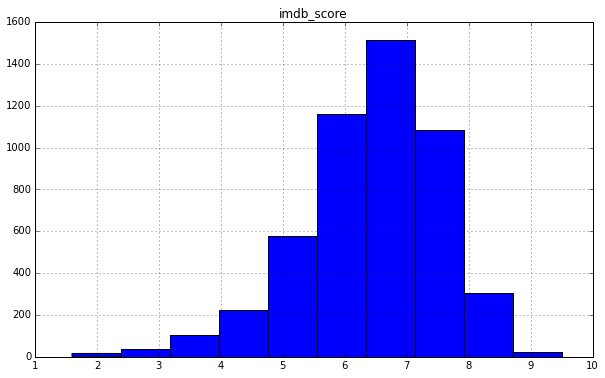

In [231]:
movs[['imdb_score']].hist()

In [241]:
### IPython Gyan!

%who DataFrame

b	 c	 close_px	 df	 df2	 foo	 group	 hdf	 movies	 
movs	 


In [240]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
b          DataFrame                   IBM   MSFT<...>2011-10-13  186.82  27.18
c          DataFrame                   IBM   MSFT<...>2011-10-13  186.82  27.18
close_px   DataFrame                   AA    AAPL<...>\n[1000 rows x 9 columns]
df         DataFrame         A      B         C  <...>three  0.928010 -0.037234
df2        DataFrame                    A        <...>84308  0.086960  0.155612
foo        DataFrame         floats  ints strings<...>    bar  False 2000-01-10
group      DataFrame         A      B         C  <...>three  0.928010 -0.037234
hdf        DataFrame                      A      <...>17454  1.104363 -1.954480
movies     DataFrame                     color   <...>n[5043 rows x 28 columns]
movs       DataFrame                     color   <...>n[5043 rows x 28 columns]


In [239]:
%who_ls DataFrame

['b', 'c', 'close_px', 'df', 'df2', 'foo', 'group', 'hdf', 'movies', 'movs']

In [247]:
sal = pd.read_csv(r'Salaries.csv')

In [311]:
sal['EmpFirstLetter'] = sal.EmployeeName.str[:1]
sal.pivot_table(index=['EmpFirstLetter'], columns=['Year'], values=['TotalPay'], aggfunc=[median, mean])

median                                           mean  \
                 TotalPay                                       TotalPay   
Year                 2011       2012       2013       2014          2011   
EmpFirstLetter                                                             
A               65162.425  67560.735  71035.865  69012.000  67678.940063   
B               71707.690  74225.175  78092.545  75498.910  74543.945176   
C               66977.485  69727.000  72340.750  70165.095  68925.002466   
D               73204.060  74934.190  80679.630  78325.550  75766.202913   
E               65568.840  68598.200  72088.370  70594.135  69363.285091   
F               67905.700  71177.370  76036.850  74918.880  71284.952568   
G               71518.770  74093.000  77015.390  75986.035  76319.672653   
H               67372.240  69284.275  71978.680  69302.230  70750.774931   
I               64318.470  68073.530  66010.630  64360.530  63171.944882   
J               71904.130  72582.000  76254.130  73772.100  73903.106667   
K               68686.820  70836.070  74154.020  73102.010  72146.136918   
L               65204.230  67525.510  70305.850  68737.520  67306.284486   
M               68333.250  71064.070  75134.690  73444.590  73058.289696   
N               63699.155  66590.050  72262.455  69507.155  67228.537056   
O               67541.010  71394.600  75419.225  70534.830  68446.813004   
P               71547.415  73227.155  78534.860  76236.525  75090.559506   
Q               56238.595  59072.490  60534.870  62411.020  56023.475370   
R               72288.165  73975.010  78300.900  76551.085  75740.907585   
S               67600.200  69183.280  74097.200  70412.300  71007.312985   
T               68660.785  71705.510  76263.600  73496.485  73567.004663   
U               52307.120  67189.530  72930.840  72800.970  60302.572162   
V               65691.940  68164.600  69452.150  66685.045  67790.889391   
W               70921.910  72693.120  73627.450  74009.260  74572.959963   
X               49571.435  51260.430  54684.325  55711.590  48824.644571   
Y               58916.960  61637.340  62918.770  60854.055  60227.668223   
Z               55655.085  56818.265  56719.100  55327.000  59245.056791   

                                                          
                                                          
Year                    2012          2013          2014  
EmpFirstLetter                                            
A               69174.704277  73246.724899  72014.376458  
B               77715.068752  79856.911802  77502.710600  
C               71722.499686  74397.533451  73114.425919  
D               78032.387262  82899.460636  80088.153392  
E               73816.857244  76070.208850  74589.775289  
F               74964.046448  79596.529293  78474.037458  
G               78476.724127  80202.309589  78394.994790  
H               72069.438369  76075.891995  72170.357107  
I               67548.086261  67105.736514  65798.987690  
J               76115.170751  79863.984656  77242.279871  
K               74136.158000  77459.284115  75257.957574  
L               69216.468480  71866.205683  69712.594843  
M               75299.933923  79324.472191  77100.219620  
N               69808.706896  74803.544698  73625.185565  
O               72707.401382  75976.040134  72468.391195  
P               77347.005092  81579.031957  80173.364359  
Q               57311.629123  59008.182742  61424.621148  
R               77697.462048  82172.628127  80036.289923  
S               73348.068968  77644.063781  74255.508392  
T               77501.463236  80617.462602  77044.068207  
U               66102.203429  75601.140588  74737.448333  
V               69236.273110  71174.767021  68694.508972  
W               76607.886293  77750.351835  78739.229988  
X               50073.505854  50378.596771  54246.543627  
Y               63341.630736  66924.917970  64432.983333  
Z               59806.61263

In [302]:
sal['PayMark'] = 'More than median'
sal.loc[sal.TotalPay.le(100000), 'PayMark'] = 'Less than median'
sal.PayMark.unique()

array(['More than median', 'Less than median'], dtype=object)

In [303]:
sal.groupby('PayMark')['Id'].count()

PayMark
Less than median    106687
More than median     41967
Name: Id, dtype: int64